<a href="https://colab.research.google.com/github/calebsiyasiya/MIT-805-Project/blob/main/MIT805_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jpmiller/healthcare")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jpmiller/healthcare/versions/2


In [4]:
#The full Kaggle data set is 33GB large. To reduce resource requirement only read in 5gb worth of data
#Load in 5GB worth of data from the hospital_prices.csv file. This is roughly 50 000 000 lines
nRowsRead = 50000000 # specify 'None' if want to read whole file
df = pd.read_csv(path +'/hospital_prices.csv', delimiter=',', nrows = nRowsRead,usecols=[1,5,7])
df.head()

<ipython-input-4-d42f4f17b457>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path +'/hospital_prices.csv', delimiter=',', nrows = nRowsRead,usecols=[1,5,7])


,payer,description,price
0,AMERIGROUP MEDICAID [350002],SEIZURES WITH MCC,26744.41
1,BLUE ADVANTAGE [308003],SEIZURES WITH MCC,26744.41
2,BLUE CROSS OF ALA [200001],SEIZURES WITH MCC,26744.41
3,CARESOURCE [100121],SEIZURES WITH MCC,26744.41
4,CONNECTICUT GENERAL [100009],SEIZURES WITH MCC,26744.41


In [7]:
#Store a 50 treatments in a list. We will determine the average cost of these treatments
procedures = df['description'].unique()[0:50]
procedures

array(['SEIZURES WITH MCC', 'SEIZURES WITHOUT MCC', 'HEADACHES WITH MCC',
       'HEADACHES WITHOUT MCC',
       'TRACHEOSTOMY FOR FACE, MOUTH AND NECK DIAGNOSES OR LARYNGECTOMY WITH MCC',
       'HC ACUTE CARE PRIVATE ROOM DAILY', 'HC FBC PRIVATE ROOM DAILY',
       'HC ANCILLARY PRIVATE ROOM DAILY',
       'HC ANCILLARY PRIVATE ROOM W/TELEMETRY DAILY',
       'HC BMU PRIVATE ROOM DAILY', 'HC ANCILLARY BMU PRIVATE ROOM DAILY',
       'EXTRAOCULAR PROCEDURES EXCEPT ORBIT',
       'INTRAOCULAR PROCEDURES WITH CC/MCC',
       'HC ACUTE CARE OUTPATIENT IN A BED', 'HC FBC OUT PATIENT IN A BED',
       'HC ANCILLARY OUTPATIENT IN A BED',
       'HC CRITICAL CARE OUTPATIENT IN A BED',
       'HC ACUTE CARE SEMI-PRIVATE ROOM DAILY',
       'HC ANCILLARY SEMI-PRIVATE ROOM DAILY',
       'NEUROLOGICAL EYE DISORDERS', 'HC BMU SEMI-PRIVATE',
       'OTHER DISORDERS OF THE EYE WITHOUT MCC',
       'OTHER EAR, NOSE, MOUTH AND THROAT O.R. PROCEDURES WITH MCC',
       'OTHER EAR, NOSE, MOUTH AND THRO

In [11]:
new_df = df[df['description'].isin(procedures)].reset_index(drop=True)
new_df = new_df[['description','price']].groupby('description').mean().sort_values(by='price',ascending=False)

In [17]:
new_df = new_df.reset_index()
new_df.head()

,description,price
0,INTRAOCULAR PROCEDURES WITH CC/MCC,156399.115231
1,"OTHER EAR, NOSE, MOUTH AND THROAT O.R. PROCEDU...",155036.904371
2,"OTHER EAR, NOSE, MOUTH AND THROAT O.R. PROCEDU...",144911.107081
3,MAJOR CHEST PROCEDURES WITH MCC,142573.403891
4,"EAR, NOSE, MOUTH AND THROAT MALIGNANCY WITH CC",139266.954086


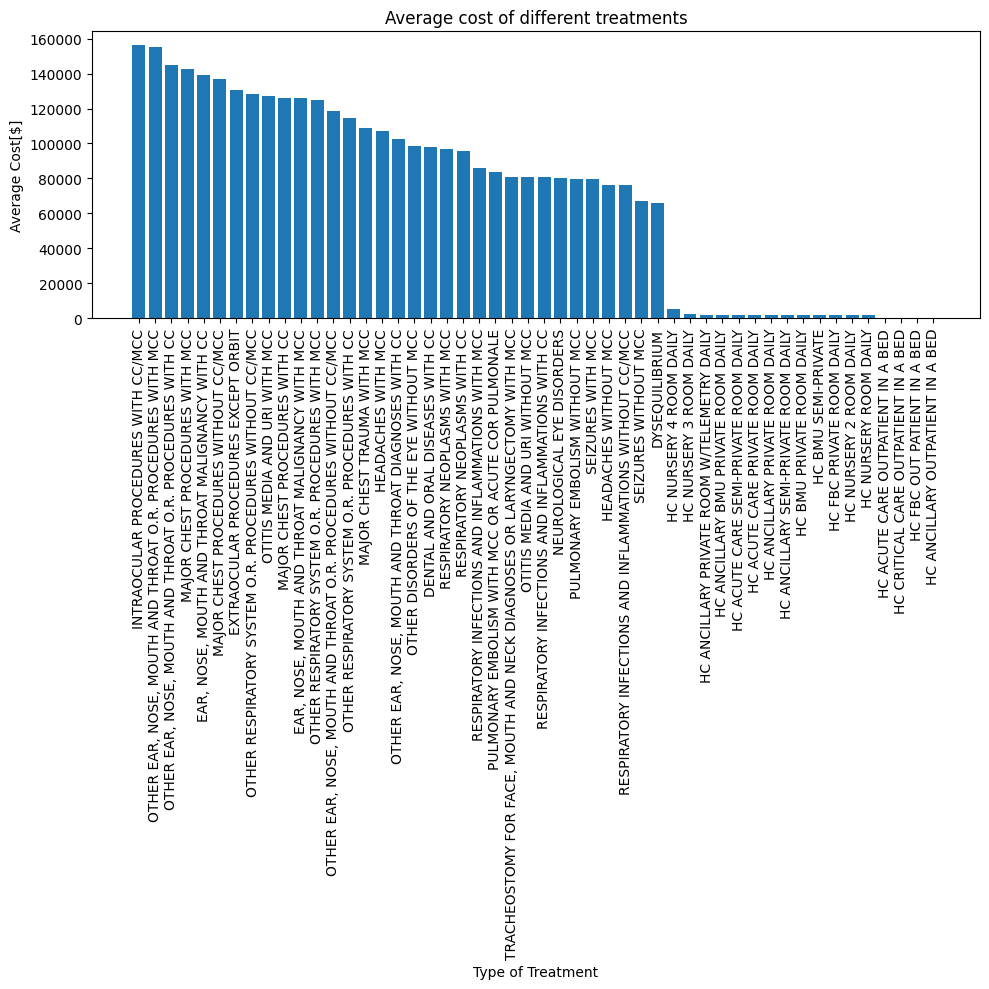

In [25]:
#Create bar graph of description on x axis and price on y axis
plt.figure(figsize=(10, 10))  # width=10, height=6

# Create the bar plot
plt.bar(new_df['description'],np.round(new_df['price'],2))

# Rotate x-axis labels to ensure readability
plt.xticks(rotation=90)  # Rotate labels by 45 degrees

# Add labels and title
plt.xlabel('Type of Treatment')
plt.ylabel('Average Cost[$]')
plt.title('Average cost of different treatments')

# Display the plot
plt.tight_layout()  # Adjusts layout to prevent clipping of labels
plt.show()